# Pre-Exercises

In [1]:
# importing matplotlib.pyplot allows us to generate graphs
import matplotlib.pyplot as plt

import random
import numpy as np

Create a forest with random tree size, the same as in the VO script. However, the forest should have the dimension 10 by 20.

Build in some randomness so that there is only a 10% chance that a tree will grow at all.

Find the largest tree, similar to the VO script. However, save not only the size of the tree, but also the x-position at which it was found (this could be the ``it``, for example).

(0.9281816783062189,
 3,
 array([0.        , 0.        , 0.92818168, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0327272 ,
        0.        , 0.        , 0.        , 0.        , 0.        ]))

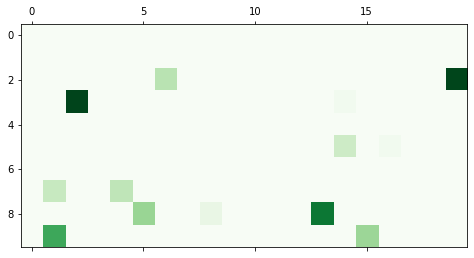

In [2]:
# Use the magic command "timeit" to find how long a cell takes on average
# to process. Attention: Remove any usage of "print" or "plot" as such
# operations usually take a lot of time.
# %%timeit

XDIM = 10
YDIM = 20

forest = np.zeros([XDIM, YDIM])

for it in range(XDIM):
    for jt in range(YDIM):
        if random.uniform(0,1) < 0.1:
            forest[it][jt] = random.uniform(0,1)
        else:
            pass
        
plt.matshow(forest, cmap = plt.cm.Greens)

maximum = 0
max_x_pos = -1
for it in range(XDIM):
    for jt in range(YDIM):
        if forest[it][jt] > maximum:
            max_x_pos = it
            maximum = forest[it][jt]
            
maximum, max_x_pos, forest[max_x_pos]

# Exercise

Create a forest of size 20 by 10. On each field can grow either a tree, or a mushroom. Mushrooms have a 10% chance of growing, otherwise a tree is created. Mushrooms are represented by random numbers from 0 to 1, trees get random numbers from 10 to 50.

Walk in a double loop through the forest. Find the biggest mushroom in the forest and write its position and size on the screen.

Maximum Mushroom size:  0.9961456718135151
Position:  (5, 9)


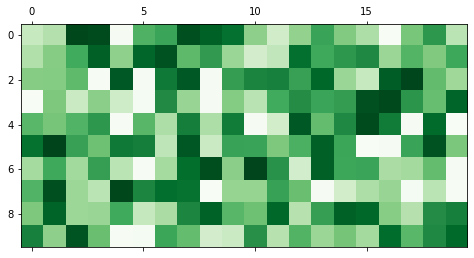

In [3]:
XDIM, YDIM = 20, 10

forest2d = np.zeros([XDIM, YDIM])

for it in range(XDIM):
    for jt in range(YDIM):
        # try growing a mushroom
        if random.uniform(0,1) < 0.1:
            forest2d[it][jt] = random.uniform(0,1)
        else: # grow a tree
            forest2d[it][jt] = random.uniform(10, 50)
            
plt.matshow(forest2d.T, cmap=plt.cm.Greens)

maxmush = 0
xposmaxmush = -1
yposmaxmush = -1
for it in range(XDIM):
    for jt in range(YDIM):
        # check if we have found a shroom
        if forest2d[it][jt] < 10:
            if forest2d[it][jt] > maxmush:
                maxmush = forest2d[it][jt]
                xposmaxmush = it
                yposmaxmush = jt
                
print("Maximum Mushroom size: ", maxmush)
print("Position: ", (xposmaxmush, yposmaxmush))

## Pre-Ex. Using numpy vectorization

Numpy's own ``np.random`` module contains many helpful functions to create matrices and vectors of random values.

As always, try: ``dir(np.random)``, observe that there is a ``uniform`` and check its API using ``help(np.random.uniform)``.

Maximum:  0.9561352924482752
Maximum pos:  (4, 5)


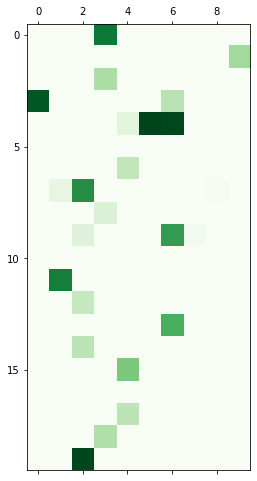

In [4]:
# %%timeit
XDIM, YDIM = 20, 10

forest = np.random.uniform(low=0.0, high=1.0, size=(XDIM, YDIM))

chance_tree_grow = np.random.choice(
      [0,1] # Choose either one or zero
    , size=(XDIM, YDIM) # Create an array with dimensions XDIM * YDIM
    , p=[0.9, 0.1] # Probability of 0 : 90 % and 1 : 10 %
    )

forest = forest * chance_tree_grow # we could also use " *= "

maximum = np.max(forest) # the maximum is retrieved using np.max
pos_max = np.unravel_index(np.argmax(forest), forest.shape)
# the index of the maximum value can also be found using numpy!


print("Maximum: ", maximum)
print("Maximum pos: ", pos_max)
plt.matshow(forest , cmap=plt.cm.Greens)